In [1]:
!pip install psycopg2-binary
import psycopg2 as pg
import numpy as np
from matplotlib import pyplot as plt
import pandas as pds
import pandas.io.sql as psql

In [2]:
con = pg.connect("dbname=testing user=postgres password=password host=localhost port=5433")
'''
df = psql.read_sql("""
select
    machine_id,
    b,
    extract(epoch from active)/3600 as active,
    extract(epoch from interrupted)/3600 as interrupted,
    extract(epoch from ready)/3600 as ready
from dist(interval '1 hour');""", con)
'''
df = psql.read_sql("""
select
    machine_id,
    b,
    extract(epoch from active)/3600 as active
from dist(interval '1 hour');""", con)

In [3]:
df.machine_id.unique().tolist()

['3c7b5d01-74a17b48-5e31c389-5192c404',
 '3c7b5d01-bc91f2d0-5e31c389-7992c4c5',
 '3c7b5d01-f691f41a-5e31c389-4a92c470',
 '3c7b5d01-fb919817-5e32c389-7992c42c',
 '3c7b5d01-5a919ef6-5e32c389-7892c46b',
 '3c7b5d01-f1a122cd-5e32c389-5492c45b']

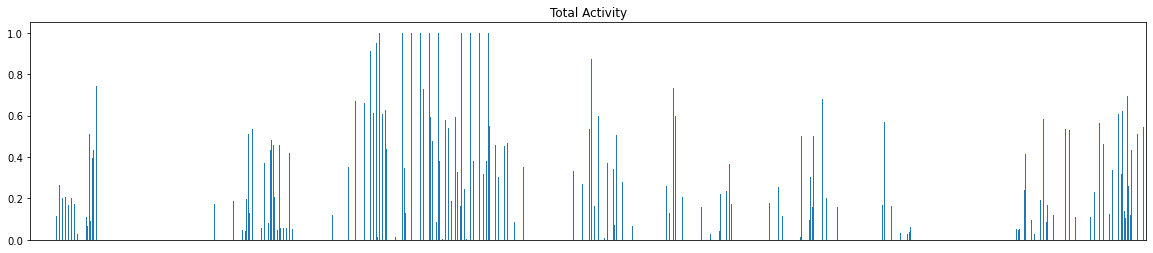

In [4]:
ax = df.plot.bar(x='b', title='Total Activity', stacked=True, figsize=(20,4), legend=False)
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)

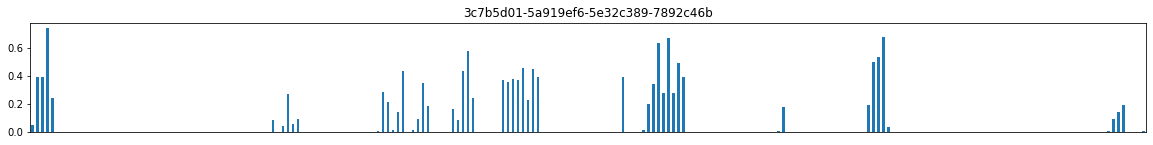

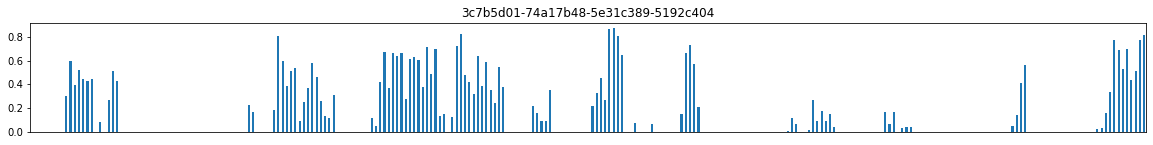

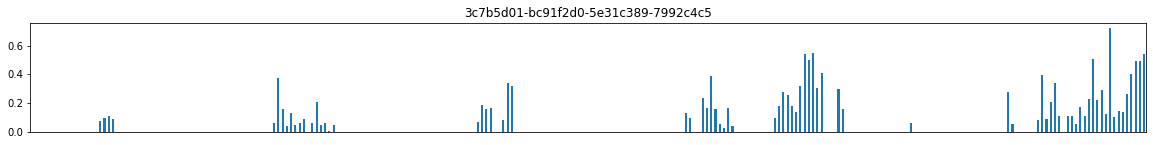

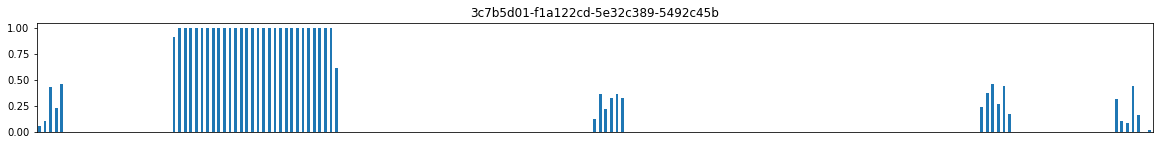

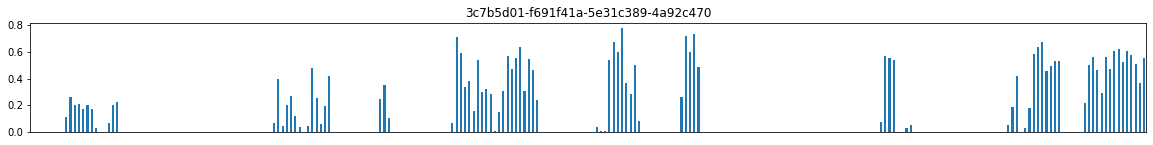

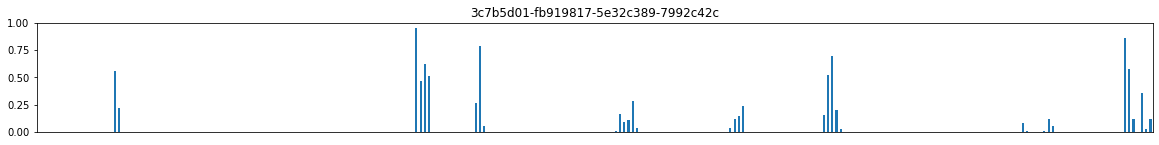

In [5]:
for key, grp in df.groupby(['machine_id']):
    ax = grp.plot.bar(x='b', title=key, figsize=(20, 2), legend=False)
    #ax.plot(grp['b'], grp['active'], label=key)
    x_axis = ax.axes.get_xaxis()
    x_axis.set_visible(False)